In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble

In [2]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape

(1140, 50, 37)

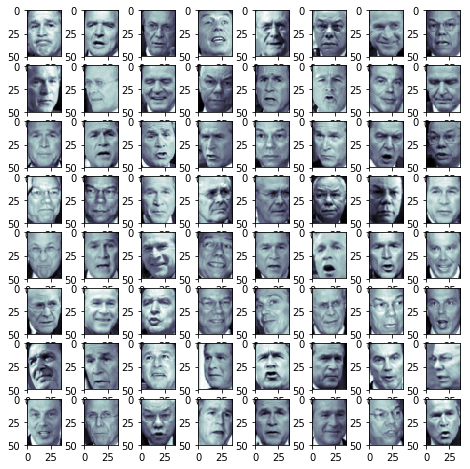

In [6]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [7]:
x, y =lfw.data, lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
pca_oliv = PCA()
pca_oliv.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
k=0
total=0
while total<0.99:
    total += pca_oliv.explained_variance_ratio_[k]
    k += 1
k

316

In [9]:
pca_lfw = PCA(n_components = k, whiten=True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [12]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape((855,50,37))

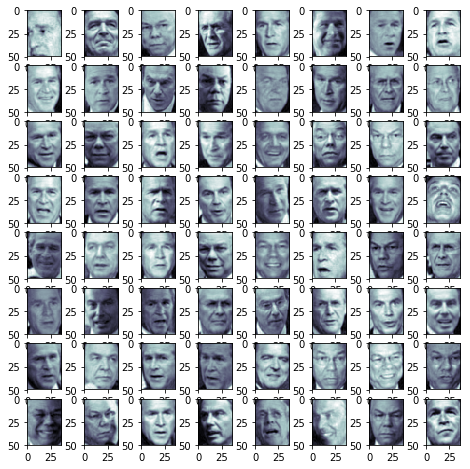

In [13]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
plt.show()

In [15]:
pca_lfw.components_.shape
eigenv = pca_oliv.components_.reshape(855,50,37)

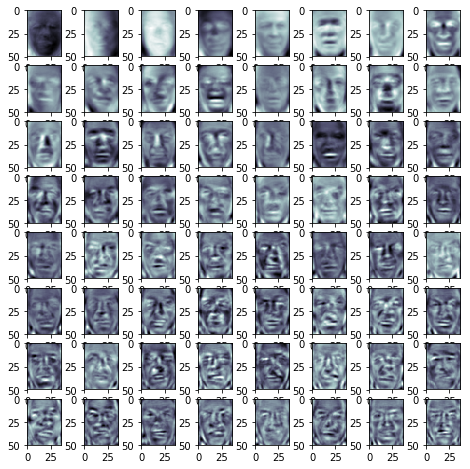

In [17]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenv[i],cmap=plt.cm.bone)
plt.show()

In [19]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)
import time

In [31]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
print(time.time() - start)
y_pred =rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.26621127128601074
             precision    recall  f1-score   support

          0       0.60      0.69      0.64        61
          1       0.62      0.28      0.38        36
          2       0.65      0.94      0.77       122
          3       0.67      0.13      0.22        31
          4       0.88      0.40      0.55        35

avg / total       0.67      0.65      0.61       285

[[ 42   2  16   0   1]
 [ 12  10  14   0   0]
 [  5   1 115   1   0]
 [  4   2  20   4   1]
 [  7   1  12   1  14]]


In [33]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, y_train)
print(time.time() - start)
y_pred =rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.1526188850402832
             precision    recall  f1-score   support

          0       0.40      0.43      0.41        61
          1       0.25      0.03      0.05        36
          2       0.52      0.81      0.63       122
          3       0.36      0.13      0.19        31
          4       0.36      0.14      0.20        35

avg / total       0.42      0.47      0.41       285

[[26  1 30  3  1]
 [10  1 24  0  1]
 [16  1 99  2  4]
 [ 7  0 17  4  3]
 [ 6  1 21  2  5]]
